In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

# Visualization of raw ds

In [2]:
BASE_SAMPLE_DS = '../../data/raw/gee_ds_20231003_formatted/0101000000A4A2486DED5649C080FFEBD61C381FC0'

In [3]:
dfs = [pd.read_csv(ds_path) for ds_path in glob.glob(f'{BASE_SAMPLE_DS}/*.csv')]

/var/folders/cc/d32dvyvs1cs6thsgc3bzl0480000gn/T/ipykernel_36555/2378444000.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


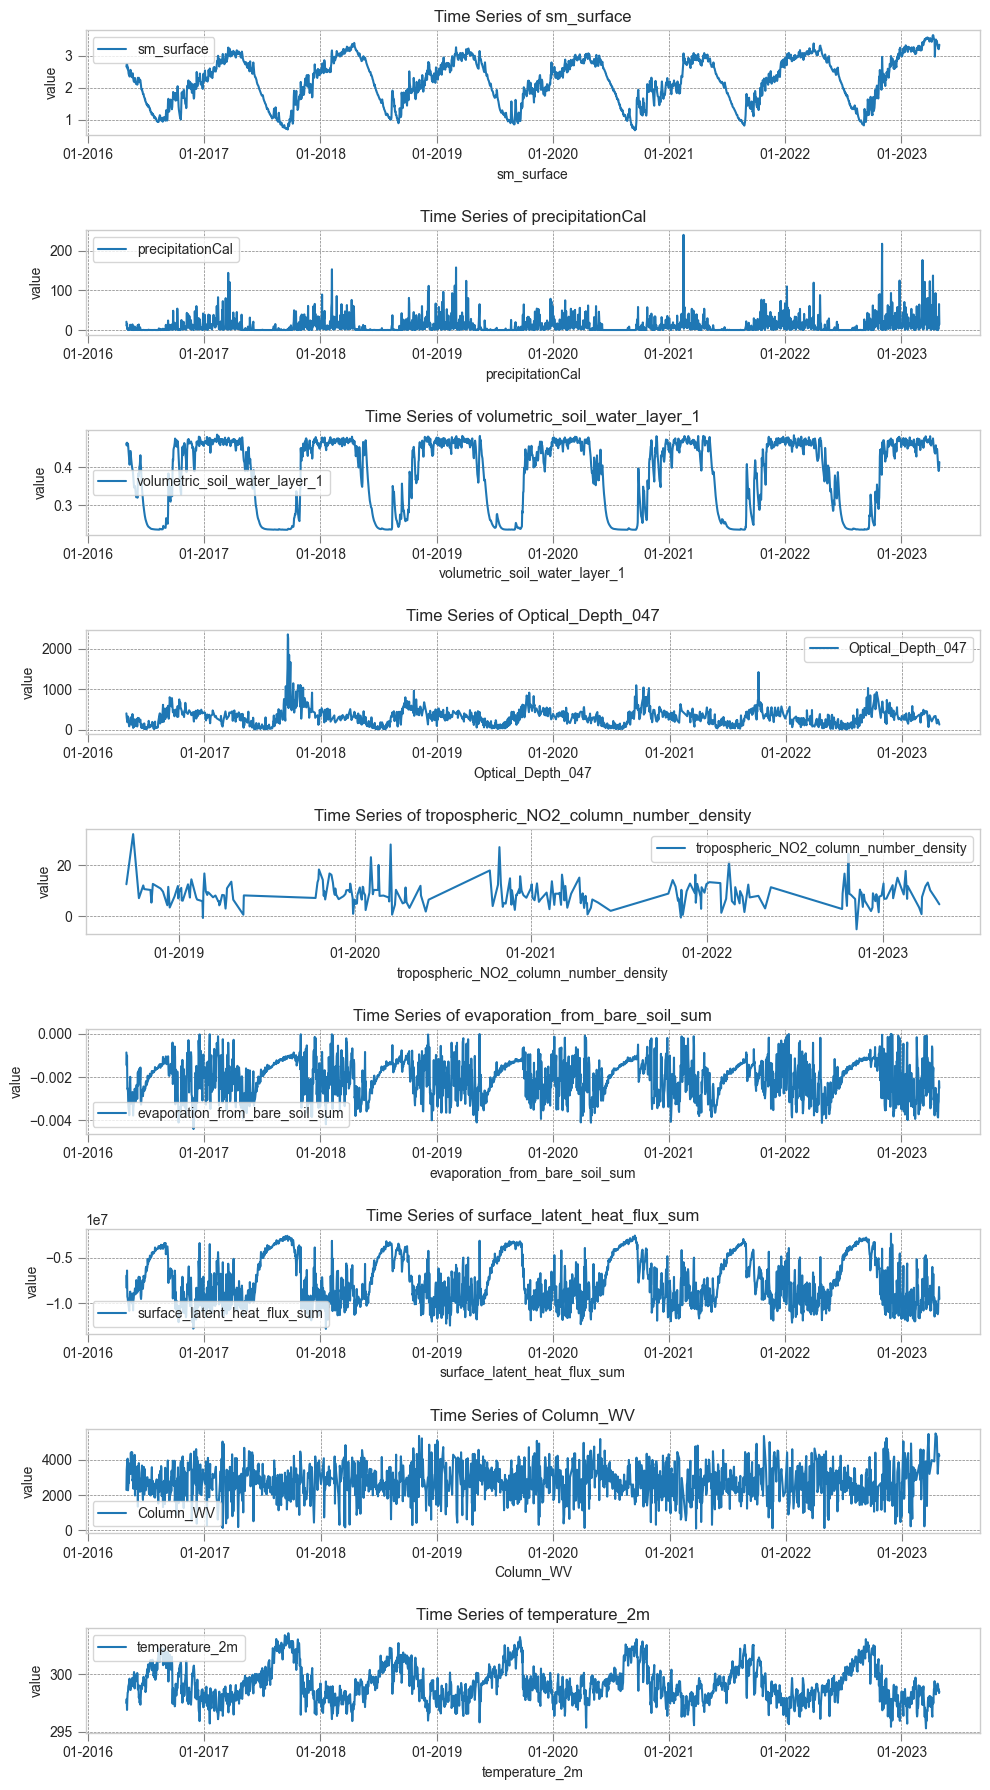

In [4]:

# Cores para cada série temporal

# Configurando o estilo do plot
plt.style.use('seaborn-whitegrid')

# Criando o GridSpec
fig = plt.figure(figsize=(10, 18))
gs = GridSpec(9, 1, figure=fig)

for i, df in enumerate(dfs):
    ax = fig.add_subplot(gs[i, 0])
    col_name = str(df.columns.to_list()[-1])
    df['date'] = pd.to_datetime(df['date'])
    ax.plot(df['date'], df[col_name], label=f'{col_name}')
    ax.set_xlabel(col_name)
    ax.set_ylabel('value')
    ax.set_title(f'Time Series of {col_name}')
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.legend(frameon=True)  # Adicionando a caixa na legenda

    # Estendendo as linhas dos ticks para fora do grid
    ax.tick_params(axis='both', which='both', direction='out', length=6, color=(0.5, 0.5, 0.5))  # Cor cinza igual ao grid

    # Ajustando a cor do grid
    ax.grid(color=(0.5, 0.5, 0.5), linestyle='--', linewidth=0.5)  # Cor cinza igual ao grid

plt.tight_layout(h_pad=2)
plt.savefig('example.pdf')
plt.show()

In [4]:
MAPPED_UNITS = {
   'tropospheric_NO2_column_number_density': '($\dfrac{mol}{m^2}',
   'Optical_Depth_047': 'valor',
   'Column_WV': 'm',
   'precipitationCal': 'mm/hr',
   'temperature_2m': 'Kelvin (K)',
   'evaporation_from_bare_soil_sum': 'metros de água',
   'volumetric_soil_water_layer_1': 'fração de volume',
   'surface_latent_heat_flux_sum': '($\dfrac{J}{m^2}',
   'sm_surface': 'fração de volume'
}

/var/folders/cc/d32dvyvs1cs6thsgc3bzl0480000gn/T/ipykernel_36772/2828986633.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


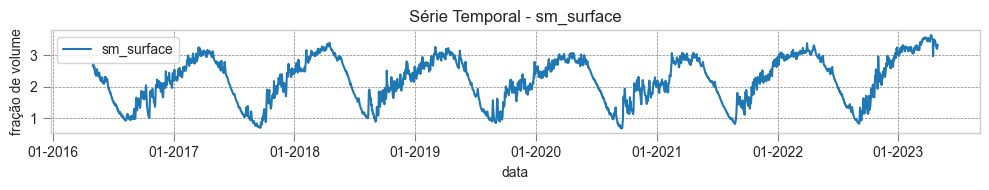

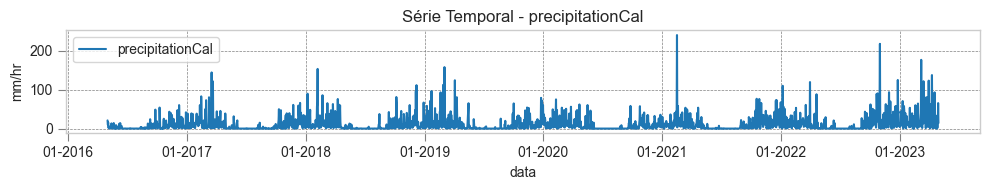

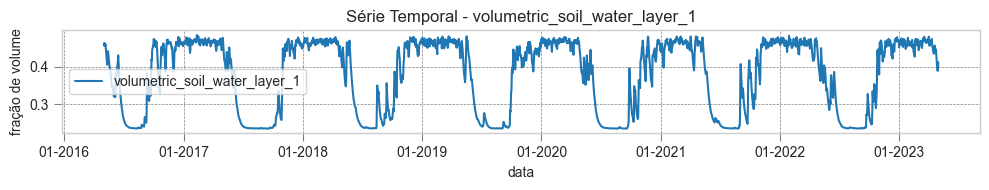

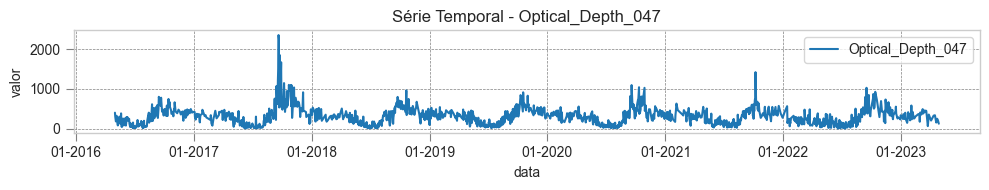

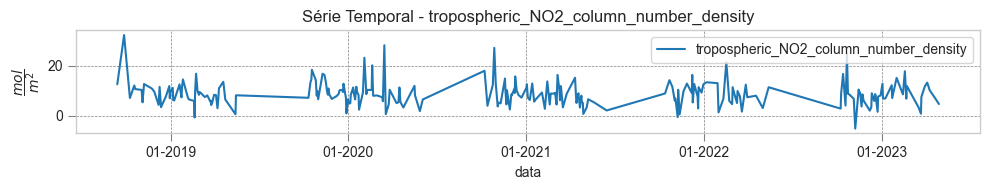

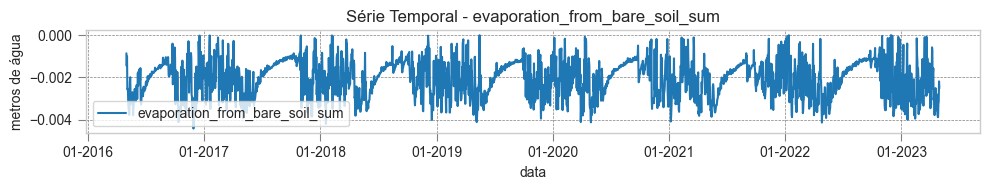

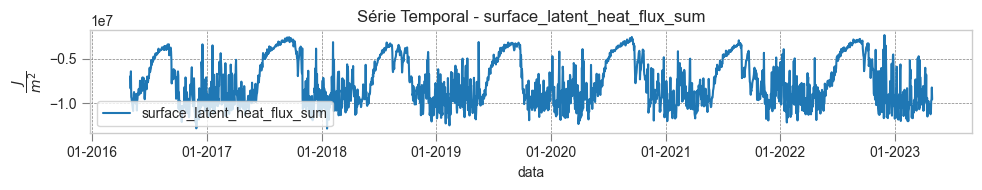

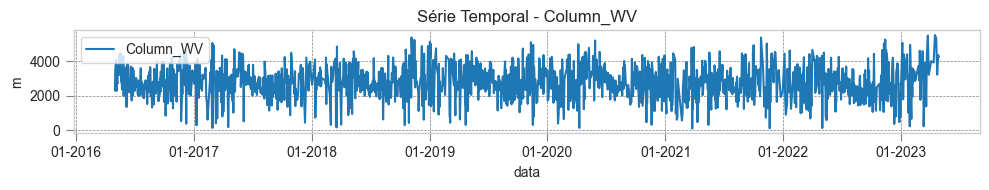

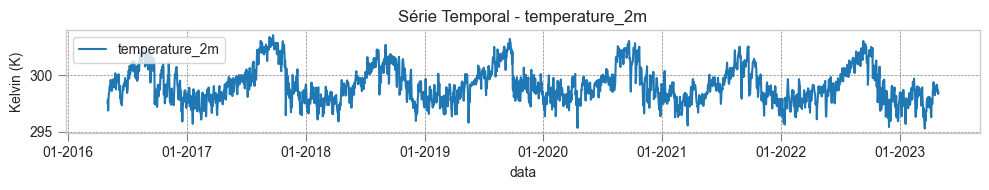

In [7]:

# Cores para cada série temporal
import pathlib as pl
# Configurando o estilo do plot
plt.style.use('seaborn-whitegrid')

SAVE_PATH = 'one_one/'
# Criando o GridSpec
pl.Path(SAVE_PATH).mkdir(parents=True, exist_ok=True)
for i, df in enumerate(dfs):
    fig = plt.figure(figsize=(10, 2))
    gs = GridSpec(1, 1, figure=fig)
    ax = fig.add_subplot(gs[0, 0])
    col_name = str(df.columns.to_list()[-1])
    df['date'] = pd.to_datetime(df['date'])
    ax.plot(df['date'], df[col_name], label=f'{col_name}')
    ax.set_xlabel('data')
    if col_name == 'surface_latent_heat_flux_sum':
        ax.set_ylabel(r'$\dfrac{J}{m^2}$')
    elif col_name == 'tropospheric_NO2_column_number_density':
        ax.set_ylabel(r'$\dfrac{mol}{m^2}$')
    else:
        ax.set_ylabel(MAPPED_UNITS[col_name])
    ax.set_title(f'Série Temporal - {col_name}')
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    ax.legend(frameon=True)  # Adicionando a caixa na legenda

    # Estendendo as linhas dos ticks para fora do grid
    ax.tick_params(axis='both', which='both', direction='out', length=6, color=(0.5, 0.5, 0.5))  # Cor cinza igual ao grid

    # Ajustando a cor do grid
    ax.grid(color=(0.5, 0.5, 0.5), linestyle='--', linewidth=0.5)  # Cor cinza igual ao grid


    plt.tight_layout()
    plt.savefig(f'{SAVE_PATH}example_{col_name}.pdf')
    plt.show()